# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#depenndecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import json
from citipy import citipy
from pprint import pprint
import os
import datetime as dt

#import the api keys needed for the data
from api_keys import g_key, weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

outputFilePath = os.path.join("Results-Data")

## Generate Cities List

In [2]:
#To generate a city list we first need to find the latitude, and longitude of the city
#Start with latitude (-90, 90) degress which equals South to North
#Then with Longitude (-180, 180) degrees which equals West to East

#Then to generate cityes increase the size form 100 to larger.
rnd_lng = np.random.uniform(-180,180,2000)
rnd_lat = np.random.uniform(-90,90,2000)

city_df = pd.DataFrame({"Latitude":rnd_lat,
                        "Longitude":rnd_lng})
#lists
city = []
country = []

for i in range(0,len(city_df['Latitude'])):
    near_city = citipy.nearest_city(city_df.iloc[i]['Latitude'],city_df.iloc[i]['Longitude']).city_name
    city.append(near_city)
    near_country = citipy.nearest_city(city_df.iloc[i]['Latitude'],city_df.iloc[i]['Longitude']).country_code
    country.append(near_country)
    
city_df['City'] = city
city_df['Country'] = country

#sort the cities to see if duplicate are in the data

city_df.sort_values(by='City', inplace=True)

#As duplicates are in the data remove duplicates and leave the first line
Clean_City_df = city_df.drop_duplicates("City", keep="first")


#Turn the new list into a index again
Clean_City_df = Clean_City_df.reset_index(drop=True)

#Find how many cities there are
len(Clean_City_df)

763

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
units = "imperial"

#pull list to replace the latitude and longitude for the closest city to the actual coordinates

lat = []
lng = []
maxtemp = []
humidity = []
windspeed = []
cloudiness = []
infodate = []

#create a loop to retrieve the weather information for each city
for index, row in Clean_City_df.iterrows():
    CurrentCity = row["City"]
    CurrentCountry = row["Country"]
    query_url = f"{url}q={CurrentCity},{CurrentCountry}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windspeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        infodate.append(response["dt"])
        print(f"Processeing Record | {CurrentCity}")
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        maxtemp.append(np.nan)
        humidity.append(np.nan)
        windspeed.append(np.nan)
        cloudiness.append(np.nan)
        infodate.append(np.nan)
        print(f"City not found. Skipping {CurrentCity}...")
        
#update the latitude and longitude for the cities and add in new collumns to the datafile
Clean_City_df["Latitude"] = lat
Clean_City_df["Longitude"] = lng
Clean_City_df["Max Temp"] = maxtemp
Clean_City_df["Humidity"] = humidity
Clean_City_df["Wind Speed"] = windspeed
Clean_City_df["Cloudiness"] = cloudiness
Clean_City_df["Date"] = infodate

#set the date
date = dt.datetime.today().strftime("%m/%d/%y")


#Remove any NaN which means missing data and then reset the index
weather_df = Clean_City_df.dropna().reset_index(drop=True)


City not found. Skipping a...
Processeing Record | aanekoski
Processeing Record | abu zabad
Processeing Record | acapulco
Processeing Record | acarau
Processeing Record | adrar
Processeing Record | ahipara
City not found. Skipping airai...
Processeing Record | akdepe
Processeing Record | aklavik
Processeing Record | aksu
Processeing Record | aktau
Processeing Record | akyab
Processeing Record | alausi
Processeing Record | albany
Processeing Record | alice springs
Processeing Record | alofi
Processeing Record | along
Processeing Record | alta floresta
Processeing Record | alta gracia
Processeing Record | altay
Processeing Record | amahai
Processeing Record | amberieu-en-bugey
City not found. Skipping ambodifototra...
Processeing Record | ambon
City not found. Skipping amderma...
Processeing Record | anadyr
Processeing Record | anantnag
Processeing Record | ancud
Processeing Record | angoram
Processeing Record | ankang
Processeing Record | anori
Processeing Record | antalya
Processeing R

City not found. Skipping illoqqortoormiut...
Processeing Record | ilulissat
Processeing Record | imbituba
Processeing Record | indianola
Processeing Record | inhambane
Processeing Record | innisfail
Processeing Record | inuvik
Processeing Record | ipilan
Processeing Record | ippy
Processeing Record | iqaluit
Processeing Record | iquique
Processeing Record | isangel
Processeing Record | ishigaki
Processeing Record | isla vista
Processeing Record | islamkot
Processeing Record | iwanai
Processeing Record | ixtapa
Processeing Record | jacareacanga
Processeing Record | jalingo
Processeing Record | jalu
Processeing Record | jambi
Processeing Record | jamestown
City not found. Skipping japura...
Processeing Record | jennings
Processeing Record | jian
Processeing Record | jiangyou
City not found. Skipping jiddah...
Processeing Record | jipijapa
Processeing Record | juneau
Processeing Record | juxtlahuaca
Processeing Record | kahului
Processeing Record | kaitangata
Processeing Record | kalabo
P

Processeing Record | puerto penasco
Processeing Record | pulivendla
Processeing Record | punta arenas
Processeing Record | puqi
Processeing Record | pustomyty
City not found. Skipping puunsi...
Processeing Record | pyay
Processeing Record | qaanaaq
Processeing Record | qasigiannguit
Processeing Record | quatre cocos
Processeing Record | rakiv lis
Processeing Record | rangapara
Processeing Record | raudeberg
Processeing Record | resistencia
Processeing Record | revelstoke
Processeing Record | ribeira grande
Processeing Record | richards bay
Processeing Record | rikitea
Processeing Record | rio gallegos
Processeing Record | rio grande
Processeing Record | roald
Processeing Record | rocha
Processeing Record | ron phibun
City not found. Skipping ruatoria...
Processeing Record | russell
Processeing Record | rzhyshchiv
Processeing Record | sabha
City not found. Skipping saint anthony...
Processeing Record | saint george
Processeing Record | saint-ambroise
Processeing Record | saint-augustin


,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,62.69,25.82,aanekoski,fi,46.40,93.0,6.93,90.0,1.603860e+09
1,12.35,29.25,abu zabad,sd,78.39,29.0,8.93,0.0,1.603860e+09
2,16.86,-99.89,acapulco,mx,80.37,84.0,4.72,96.0,1.603859e+09
3,-2.89,-40.12,acarau,br,76.37,87.0,9.46,100.0,1.603860e+09
4,25.75,-1.00,adrar,dz,69.57,23.0,11.63,9.0,1.603860e+09
...,...,...,...,...,...,...,...,...,...
681,47.80,67.71,zhezkazgan,kz,31.08,89.0,13.67,57.0,1.603860e+09
682,66.77,123.37,zhigansk,ru,-2.56,91.0,4.47,73.0,1.603860e+09
683,22.28,113.57,zhuhai,cn,80.60,78.0,9.17,20.0,1.603860e+09
684,51.13,15.92,zlotoryja,pl,39.99,88.0,6.35,71.0,1.603860e+09


In [12]:
weather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,62.69,25.82,aanekoski,fi,46.40,93.0,6.93,90.0,1.603860e+09
1,12.35,29.25,abu zabad,sd,78.39,29.0,8.93,0.0,1.603860e+09
2,16.86,-99.89,acapulco,mx,80.37,84.0,4.72,96.0,1.603859e+09
3,-2.89,-40.12,acarau,br,76.37,87.0,9.46,100.0,1.603860e+09
4,25.75,-1.00,adrar,dz,69.57,23.0,11.63,9.0,1.603860e+09
...,...,...,...,...,...,...,...,...,...
681,47.80,67.71,zhezkazgan,kz,31.08,89.0,13.67,57.0,1.603860e+09
682,66.77,123.37,zhigansk,ru,-2.56,91.0,4.47,73.0,1.603860e+09
683,22.28,113.57,zhuhai,cn,80.60,78.0,9.17,20.0,1.603860e+09
684,51.13,15.92,zlotoryja,pl,39.99,88.0,6.35,71.0,1.603860e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df.to_csv(os.path.join(outputFilePath,"Cities_Climate.csv"),index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_df = weather_df.drop(weather_df[weather_df["Humidity"]>100].index,inplace=False).reset_index(drop=True)
humidity_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,62.69,25.82,aanekoski,fi,46.40,93.0,6.93,90.0,1.603860e+09
1,12.35,29.25,abu zabad,sd,78.39,29.0,8.93,0.0,1.603860e+09
2,16.86,-99.89,acapulco,mx,80.37,84.0,4.72,96.0,1.603859e+09
3,-2.89,-40.12,acarau,br,76.37,87.0,9.46,100.0,1.603860e+09
4,25.75,-1.00,adrar,dz,69.57,23.0,11.63,9.0,1.603860e+09
...,...,...,...,...,...,...,...,...,...
681,47.80,67.71,zhezkazgan,kz,31.08,89.0,13.67,57.0,1.603860e+09
682,66.77,123.37,zhigansk,ru,-2.56,91.0,4.47,73.0,1.603860e+09
683,22.28,113.57,zhuhai,cn,80.60,78.0,9.17,20.0,1.603860e+09
684,51.13,15.92,zlotoryja,pl,39.99,88.0,6.35,71.0,1.603860e+09


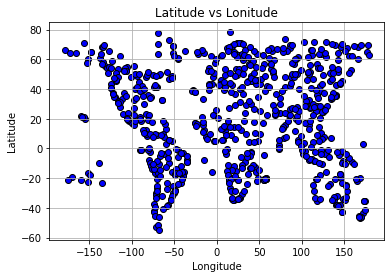

In [17]:
plt.scatter(humidity_df['Longitude'],humidity_df['Latitude'],color='blue',edgecolors='black')

plt.title(f"Latitude vs Lonitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig(os.path.join(outputFilePath, "Latitude_vs_Longitude_Cityies.png"))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

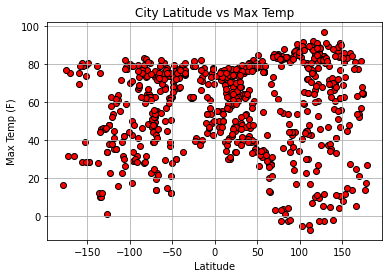

In [18]:
plt.scatter(humidity_df['Longitude'],humidity_df['Max Temp'],color='red',edgecolors='black')

plt.title(f"City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

plt.savefig(os.path.join(outputFilePath, "Max_Temp_vs_Latitude.png"))

In [ ]:
#Based on the information above the following is true.
#While there are a long range of temps the equator which on Latitude lin is 0 shows only higher tempatures.
#The north and south poles seem to have almost the eact range in temperatures

## Latitude vs. Humidity Plot

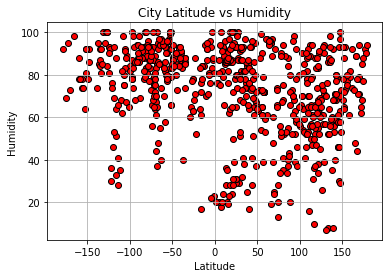

In [19]:
plt.scatter(humidity_df['Longitude'],humidity_df['Humidity'],color='red',edgecolors='black')

plt.title(f"City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.savefig(os.path.join(outputFilePath, "Humidityvs_Latitude.png"))

In [ ]:
#Based on the above information is true.
# this is calculating the latitude of the city and comparing there humidity levels.
#The closer they are to the equater the hotter it seems to get, besides a few places that are clooler then the others.

## Latitude vs. Cloudiness Plot

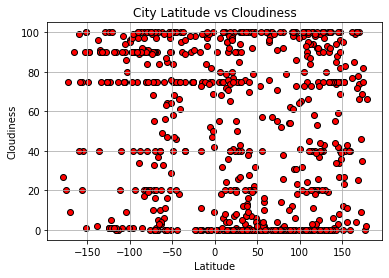

In [20]:
plt.scatter(humidity_df['Longitude'],humidity_df['Cloudiness'],color='red',edgecolors='black')

plt.title(f"City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig(os.path.join(outputFilePath, "Cloudiness_vs_Latitude.png"))

In [ ]:
#Based on the above information is true.
#Cloudiness seems to be evenly distributed in all Latitudes for the Cities
# There seems to be a higher number of clouds at the lowest temperatures to the highest temperatures though.

## Latitude vs. Wind Speed Plot

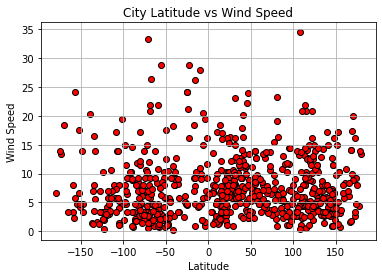

In [21]:
plt.scatter(humidity_df['Longitude'],humidity_df['Wind Speed'],color='red',edgecolors='black')

plt.title(f"City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig(os.path.join(outputFilePath, "Wind_Speed_vs_Latitude.png"))

In [ ]:
#Based on the above information is true.
#Wind Speed is most common at the lower speeds from 0 to 10 mph but at those speeds evenly spread throughout all the cities.

## Linear Regression

In [22]:
North_df = humidity_df.loc[humidity_df["Latitude"]>=0]
South_df = humidity_df.loc[humidity_df["Latitude"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

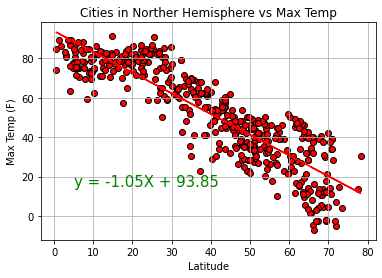

In [25]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(North_df['Latitude'], North_df['Max Temp'])
regress = North_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(North_df['Latitude'], North_df['Max Temp'],color='red',edgecolors='black')
plt.plot(North_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(5,15),fontsize=15,color='green')
plt.title(f"Cities in Norther Hemisphere vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "MaxTamp_vs_Cities_In_Northern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#The line shows a clear indication that the closer to the equator which is 0 the higher the temperature is.
#On the other hand the lower temperatures seem to get lower closer to the north pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

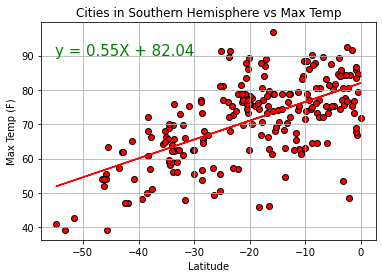

In [30]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(South_df['Latitude'], South_df['Max Temp'])
regress = South_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(South_df['Latitude'], South_df['Max Temp'],color='red',edgecolors='black')
plt.plot(South_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(-55,90),fontsize=15,color='green')
plt.title(f"Cities in Southern Hemisphere vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "MaxTamp_vs_Cities_In_Southern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#The line shows a clear indication that the closer to the equator which is 0 the higher the temperature is.
#On the other hand the lower temperatures seem to get lower closer to the south pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

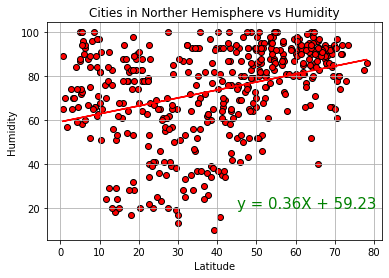

In [34]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(North_df['Latitude'], North_df['Humidity'])
regress = North_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(North_df['Latitude'], North_df['Humidity'],color='red',edgecolors='black')
plt.plot(North_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(45,20),fontsize=15,color='green')
plt.title(f"Cities in Norther Hemisphere vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Humidity_vs_Cities_In_Northern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#In the norther hemispher there is a consistent trend of humidity above 75% with a large closter close to the north pole.
#which is between 60 and 70 latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

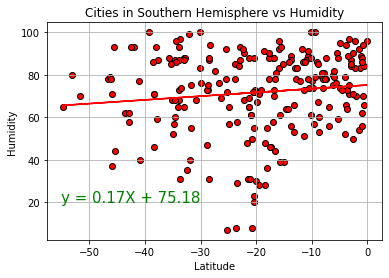

In [40]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(South_df['Latitude'], South_df['Humidity'])
regress = South_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(South_df['Latitude'], South_df['Humidity'],color='red',edgecolors='black')
plt.plot(South_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(-55,20),fontsize=15,color='green')
plt.title(f"Cities in Southern Hemisphere vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Humidity_vs_Cities_In_Southern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#In the norther hemispher there is a consistent trend of humidity above 75% with a large closter close to the equater.
#which is between -10 and 0 latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

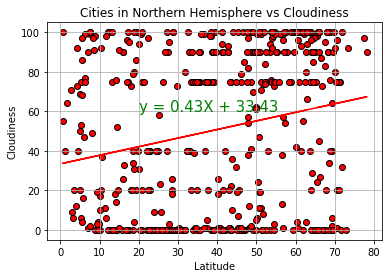

In [41]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(North_df['Latitude'], North_df['Cloudiness'])
regress = North_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(North_df['Latitude'], North_df['Cloudiness'],color='red',edgecolors='black')
plt.plot(North_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(20,60),fontsize=15,color='green')
plt.title(f"Cities in Northern Hemisphere vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Cloudiness_vs_Cities_In_Northern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#Based on the dataset there is not much trend of cloudiness in the northern hemisphere.
#It slightly increases the farther from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

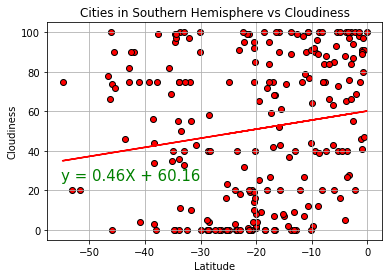

In [42]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(South_df['Latitude'], South_df['Cloudiness'])
regress = South_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(South_df['Latitude'], South_df['Cloudiness'],color='red',edgecolors='black')
plt.plot(South_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(-55,25),fontsize=15,color='green')
plt.title(f"Cities in Southern Hemisphere vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Cloudiness_vs_Cities_In_Southern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#Based on the dataset there is not much trend of cloudiness in the southern hemisphere.
#It slightly increases the farther from the equator between -30 and -20 also the temperature is at 0 or less.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

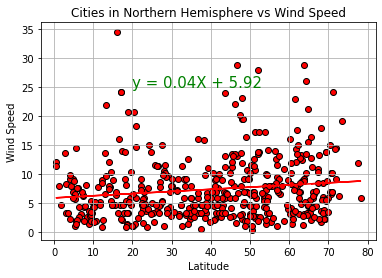

In [46]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(North_df['Latitude'], North_df['Wind Speed'])
regress = North_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(North_df['Latitude'], North_df['Wind Speed'],color='red',edgecolors='black')
plt.plot(North_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(20,25),fontsize=15,color='green')
plt.title(f"Cities in Northern Hemisphere vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Wind Speed_vs_Cities_In_Northern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#Wind speeds also don't have much of a trend in the northern hemisphere.
#There is a slight increase farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

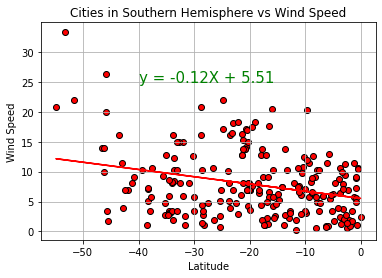

In [45]:
#Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(South_df['Latitude'], South_df['Wind Speed'])
regress = South_df['Latitude']*slope+intercept
line = "y = "+str(round(slope,2))+"X + "+str(round(intercept,2))

#Scatter Plot
plt.scatter(South_df['Latitude'], South_df['Wind Speed'],color='red',edgecolors='black')
plt.plot(South_df['Latitude'],regress,"r-")

#Enter in the axes title for the scatter plot
plt.annotate(line,(-40,25),fontsize=15,color='green')
plt.title(f"Cities in Southern Hemisphere vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

#Create as image png file for the graph
plt.savefig(os.path.join(outputFilePath, "Wind Speed_vs_Cities_In_Southern_Hemisphere"))

plt.show()

In [ ]:
#Based on the graph above the following is true.
#Wind speeds seem to about stay around 5 mph but seem to closter closer to the equator -10 and 0
